# Шпаргалка по графикам matplotlib и seaborn.

Друзья, в сборном проекте вам приходится сталкиваться со множеством графиков, давайте коротко разберем на простых примерах, что мы можем сделать при помощи наших графических библиотек.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Возьмем наш любимый датафрейм с зарплатами аналитиков в условных единицах.

In [2]:
df = pd.DataFrame(data={'Имя': ['Анна', 'Сергей', 'Алексей', 'Сергей', 'Екатерина'], 'Фамилия': ['Егорова', 'Тищенко', 'Маевский', 'Пеньков', 'Никонова'] ,'Январь': [1000, 1300, 800, 1100, 2000], 'Февраль': [1100, 1250, 750, 1100, 1800], 
     'Март': [950, 1320, 900, 1200, 1950]})
df

,Имя,Фамилия,Январь,Февраль,Март
0,Анна,Егорова,1000,1100,950
1,Сергей,Тищенко,1300,1250,1320
2,Алексей,Маевский,800,750,900
3,Сергей,Пеньков,1100,1100,1200
4,Екатерина,Никонова,2000,1800,1950


В таком виде обрабатывать данные не всегда удобно. Для анализа и визуализации гораздо лучше подходит "вертикальная таблица", в которой минимум столбцов, но в каждой строке содержится информация по одному наблюдению. В нашем случае наблюдение - это один месяц одного сотрудника. Превратить горизонтальную табличку в вертикальную мы можем при помощи метода melt. 

In [3]:
df = df.melt(['Имя', 'Фамилия'])
df.columns = ['Имя', 'Фамилия', 'месяц', 'зарплата']

Не будем здесь подробно разбирать, как это работает. Более подробно этот процесс еще будет описан в курсе. Если процесс не сильно понятно, можно нне вникать, просто сосредоточимся на результате:

In [4]:
df

,Имя,Фамилия,месяц,зарплата
0,Анна,Егорова,Январь,1000
1,Сергей,Тищенко,Январь,1300
2,Алексей,Маевский,Январь,800
3,Сергей,Пеньков,Январь,1100
4,Екатерина,Никонова,Январь,2000
5,Анна,Егорова,Февраль,1100
6,Сергей,Тищенко,Февраль,1250
7,Алексей,Маевский,Февраль,750
8,Сергей,Пеньков,Февраль,1100
9,Екатерина,Никонова,Февраль,1800


То етсь мы получили табличку в том же виде, с каким работаем в проектах - минимум столбцов, а в каждой строке некая сущность, в нашем случае это зарплата для каждого сотрудника в каждом месяце.

Допустим, мы хотим на одном графике отследить динамику доходов всех наших сотрудников по месяцам. Для периодов времени хорошо подходят простые линейные графики с отображением времени по оси Х:

Text(0, 0.5, 'Зарплата')

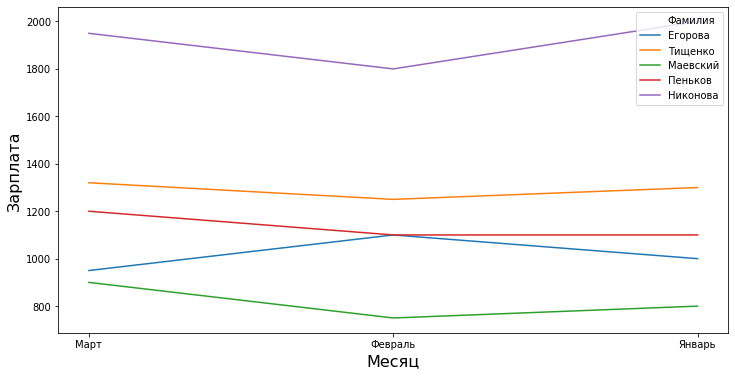

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='месяц', y='зарплата', hue='Фамилия', data=df)
plt.xlabel('Месяц',fontsize=16)
plt.ylabel('Зарплата',fontsize=16)

Думаю, здесь все интуитивно понятно: задали размер, вызвали метод отрисовки линейного графика популярной библиотеки seaborn, указали оси и источник данных. Параметром hue мы задаём столбец, по которому хотим разбить данные и отобразить разными цветами.  
Месяцев у нас маловато, но если мы у нас были данные за год, можно было бы наглядно отследить рост/падение доходов каждого сотрудника.

Теперь давайте оценим разброс зарплаты для каждого сотрудника:

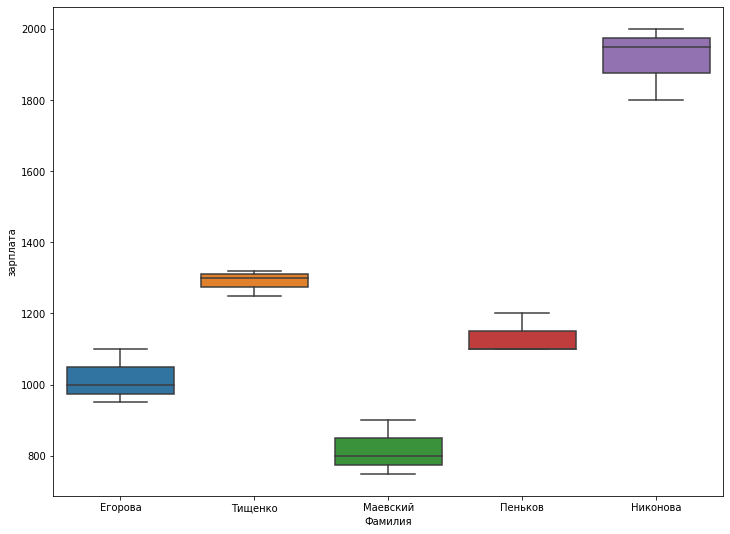

In [7]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Фамилия', y='зарплата', data = df)

Хорошо видно, кто в лидерх, а кто в отстающих, а также в каких пределах наши доходы.

Теперь давайте сравним суммарные доходы. Для начала сформируем сводную по сотрудникам:

In [8]:
df.pivot_table(index='Фамилия', values='зарплата', aggfunc='sum')

,зарплата
Фамилия,
Егорова,3050
Маевский,2450
Никонова,5750
Пеньков,3400
Тищенко,3870


Все очень наглядно, давайте визуализируем эту маленькую табличку:

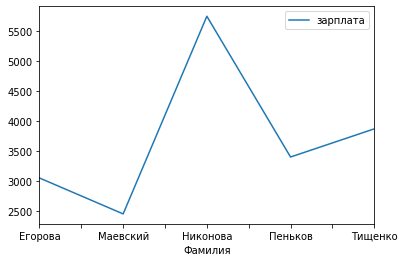

In [9]:
df.pivot_table(index='Фамилия', values='зарплата', aggfunc='sum').plot()

Честно говоря, выглядит не очень, для сравнения количественных данных бок о бок лучше подойдут бары, плюс давайте данные отсортируем:

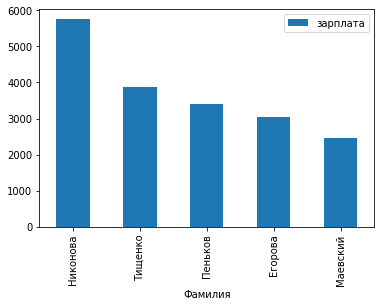

In [10]:
df.pivot_table(index='Фамилия', values='зарплата', aggfunc='sum').sort_values(by='зарплата',ascending=False).plot(kind='bar')

Согласитесь, гораздо приятнее глазу.

И напоследок, давайте отобразим несколько графиков по разным месяцам рядом. Для этого создадим объект figure - это как палитра, на которой мы разместим три графика - axes. (Первыми параметрами задаем сетку 1х3)

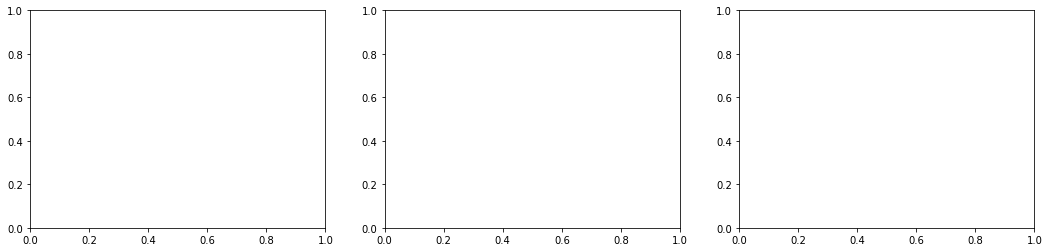

In [11]:
fig, axes = plt.subplots(1, 3, figsize = (18,4))

Пока что графики пустые, но каждая из трех ячеек у нас сохранена в списке axes.

In [18]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee34e37d90>,
      dtype=object)

 Мы можем построить какой-нибудь график на любой из них и график отрисуется в указанной ячейке. Например, построим простой линейный график во второй ячейке:

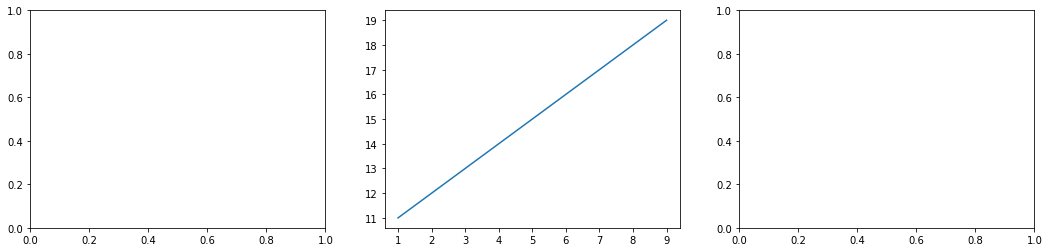

In [12]:
axes[1].plot(range(1,10),range(11,20))
fig

Но вернемся к нашим зарплатам.

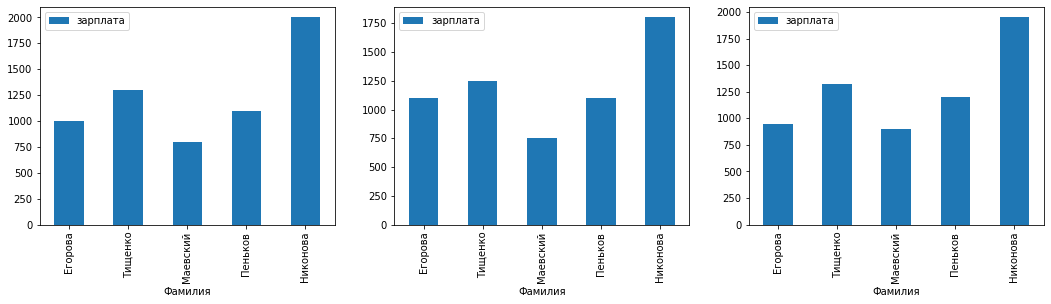

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (18,4))
months = ['Январь','Февраль','Март']
i = 0
for month in months: #пройдем по списку месяцев
    (
    df.query('месяц == @month') #оставим для графика только один месяц
        .plot(x = 'Фамилия', y = 'зарплата', kind='bar', ax = axes[i])
    )
    i+=1

Давайте разберем, что здесь происходит.
С объектом figure мы разобрались. Далее, мы проходим по списку месяцев, на каждогй итерации отфильтровываем из таблицы данные только для текущего месяца и рисуем график с барами, задавая ему ячейку, куда мы хотим его поместить (`ax = axes[i]`) В конце прибавляем к номеру ячейки единицу, чтобы следующий график поместить в следующую ячейку.

Получилось не без иъянов. Мне кажется, подписи с фамилией лишние - и так понятно, о чем речь. Да и легенда ни к чему, луче сделаем подпись для всего графика. И, для полного счастья, немного уевличим шрифты, а то фамилии почни не видно.

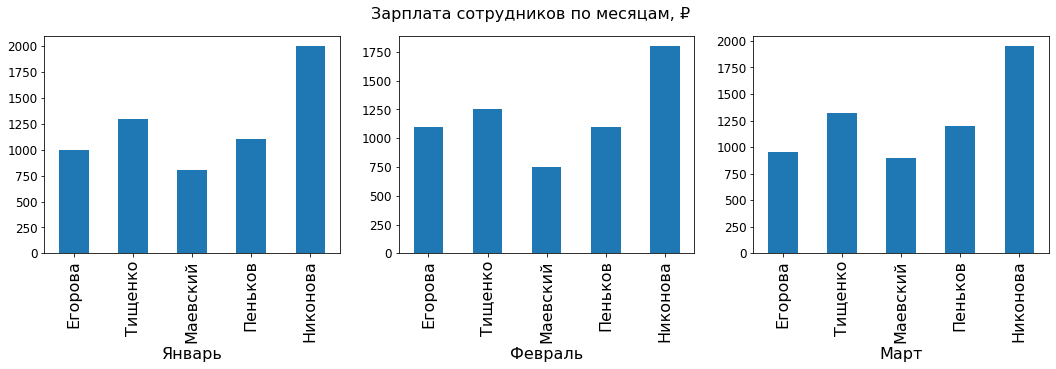

In [19]:
#устанавливаем шрифты для различных элементов графика
plt.rc('xtick', labelsize=16)   
plt.rc('ytick', labelsize=12)   
plt.rc('axes', labelsize=16)
plt.rc('figure', titlesize=16)

fig, axes = plt.subplots(1, 3, figsize = (18,4))
fig.suptitle('Зарплата сотрудников по месяцам, ₽') # задаём общий заголовок
i = 0
for month in months:
    (
    df.query('месяц == @month')
        .plot(x = 'Фамилия', y = 'зарплата', kind='bar', ax = axes[i])
        .set(xlabel=month) # подписываем каждый график своим месяцем
    )
    axes[i].get_legend().remove() #убираем легенду
    i+=1

Теперь гораздо лучше. Думаю, на этом стоит остановиться, все показанные приемы можно применить в сборном проекте. Спаисбо всем, кто уделил внимание.